<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Finetuning_OpenThaiGPT_1_0_0_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finetuning OpenThaiGPT 1.0.0-beta

<img src="https://1173516064-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FvvbWvIIe82Iv1yHaDBC5%2Fuploads%2Fb8eiMDaqiEQL6ahbAY0h%2Fimage.png?alt=media&token=6fce78fd-2cca-4c0a-9648-bd5518e644ce
https://openthaigpt.aieat.or.th/" width="200px">

The process of fine-tuning OpenThaiGPT 1.0.0-beta, a 7-billion parameter model, involves a few specific considerations regarding the choice of computing resources, particularly the GPU. Here's a rewritten and more detailed explanation:

## Selection of GPU:
NVIDIA A100 with 40GB Memory - This step involves choosing an appropriate GPU for the task. The NVIDIA A100 with 40GB memory is recommended due to its high performance and substantial memory capacity.

## Why Choose a GPU with 40GB Memory?
The general guideline for fine-tuning large language models like OpenThaiGPT 1.0.0-beta is that the GPU memory should be at least four times the size of the model's parameters. Since this model has 7 billion parameters, it would ideally require 28GB of GPU memory. Therefore, a GPU with a memory size close to or exceeding this requirement is essential to handle the computational demands effectively.

## Training in FP16 Precision Mode
The training or fine-tuning process is often conducted in FP16 (16-bit floating-point) precision mode. This mode is a balance between performance and memory usage. It allows for faster computations compared to 32-bit precision while still maintaining sufficient accuracy. The 40GB memory of the A100 is more than adequate for this purpose, ensuring smooth and efficient fine-tuning of the model.

## Support
- Official website: https://openthaigpt.aieat.or.th
- Facebook page: https://web.facebook.com/groups/openthaigpt
- A Discord server for discussion and support [here](https://discord.gg/rUTp6dfVUF)
- E-mail: kobkrit@iapp.co.th
  
## License
**Source Code**: License Apache Software License 2.0.<br>
**Weight**: Research and **Commercial uses**.<br>

## Code and Weight
**Finetune Code**: https://github.com/OpenThaiGPT/openthaigpt-finetune-010beta<br>
**Inference Code**: https://github.com/OpenThaiGPT/openthaigpt<br>
**Weight**: https://huggingface.co/openthaigpt/openthaigpt-1.0.0-beta-chat-7b-ckpt-hf

In [ ]:
!nvidia-smi

Sun Nov 12 07:10:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Finetuning Source code
The fine-tuning code developed for version 0.1.0-beta is fully compatible with version 1.0.0-beta. This is because both versions share the same underlying architecture, Llama v2. Therefore, the same codebase can be effectively utilized for fine-tuning the 1.0.0-beta version.

In [ ]:
!git clone https://github.com/OpenThaiGPT/openthaigpt-finetune.git

Cloning into 'openthaigpt-finetune'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 60 (delta 22), reused 34 (delta 9), pack-reused 0
Receiving objects: 100% (60/60), 20.77 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%cd openthaigpt-finetune

/content/openthaigpt-finetune


### Install Requirements

In [ ]:
! pip install -r requirements.txt

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-fo9l6sjz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-fo9l6sjz
  Resolved https://github.com/huggingface/peft.git to commit 5d84484079ee72c92678eadb273d3fe0241ed5ea
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Dataset Preparation for Fine-Tuning

When preparing a dataset for fine-tuning, consider the following guidelines:

- **Format Preference**: The dataset should be in JSON Lines (JSONL) format. This format maintains each data entry on a separate line, enhancing readability and processing efficiency.

- **Data Structure**: Each entry in the dataset should contain three fields:
  - `instruction`: Describes the task or context for the model.
  - `input`: Provides the actual input that the model will process.
  - `output`: Contains the expected output or response from the model.

- **Dataset Size**: Aim for a minimum of 10,000 pairs (input-output sets). This size is suggested to provide enough data for effective learning, though the focus should remain on data quality.

- **Quality Over Quantity**: Prioritize the quality of data. High-quality data leads to better model performance, even if the overall quantity is lower.

- **Data Variance**: Ensure diversity in the dataset. Varied data helps in training a model that is robust and performs well across different types of inputs and scenarios.


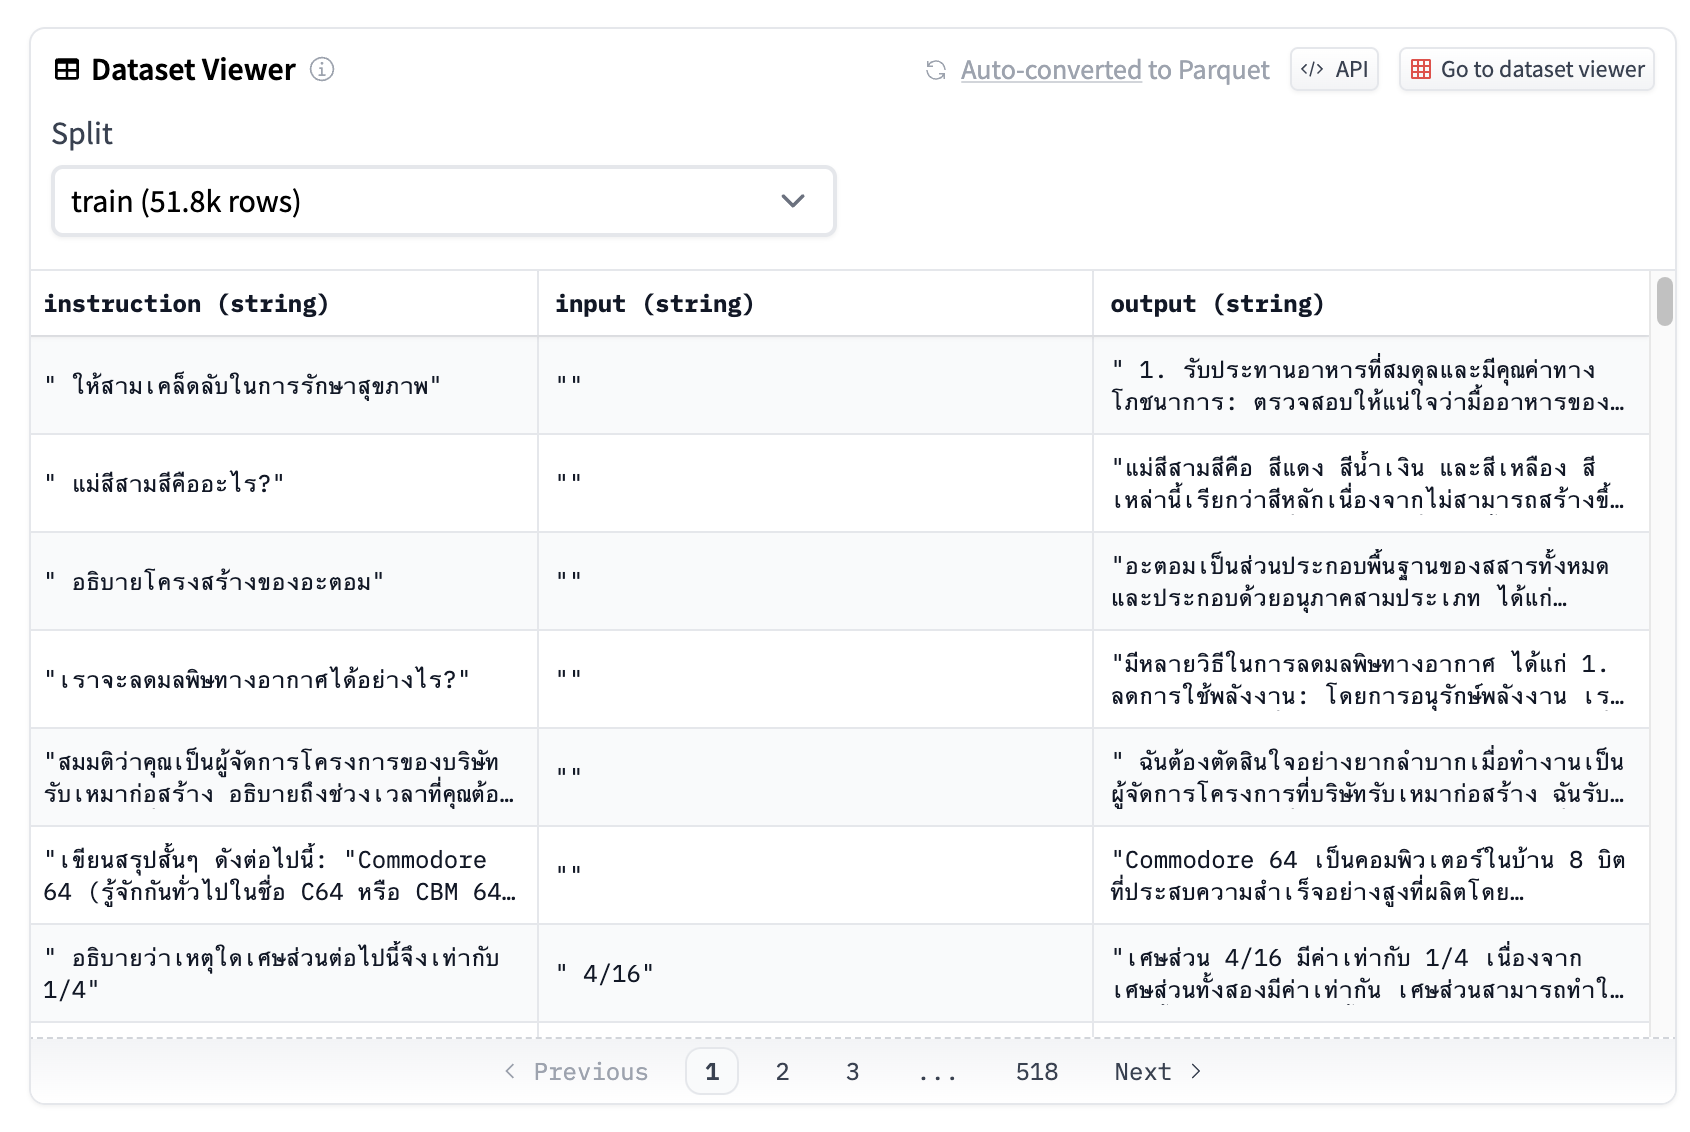

# Example: Thai Spoonerism (คำผวน) (18+)
Thai Spoonerism refers to a playful linguistic phenomenon where the initial sounds or syllables of words within a phrase or sentence are swapped. This practice, similar to Spoonerism in English, is often used for humorous effect or to add a whimsical twist to the language. In Thai, this can involve switching the initial consonants or vowels of two words, creating phrases that sound amusing or intriguing due to the unexpected sound swap. The charm of Thai Spoonerism lies in its ability to transform ordinary language into something playful and engaging, often leading to amusing misunderstandings or clever wordplay. It's a testament to the flexibility and fun inherent in language manipulation, and it holds a special place in Thai culture, much like its counterpart in English-speaking countries.

## Convert Dataset to JSONL format

In [ ]:
!gdown 1fs9TJGo_PdDA6QwuU8WTkd-0o9fKU8Uk

Downloading...
From: https://drive.google.com/uc?id=1fs9TJGo_PdDA6QwuU8WTkd-0o9fKU8Uk
To: /content/openthaigpt-finetune/khumpun-200-18++.csv
100% 11.0k/11.0k [00:00<00:00, 43.0MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('khumpun-200-18++.csv')


In [ ]:
df

,w1,w2
0,คำผวน,ควนผำ
1,นอนแล้ว,แนวล้อน
2,ตะปู,ตูปะ
3,นักเรียน,เนียนรัก
4,ขนม,ขมหนะ
...,...,...
194,ไรเต็มหัวจั๊ก,รักเต็มหัวใจ
195,ไทยมีเจอ,เทอไม่มีใจ
196,คันถึงทุกวิ,คิดถึงทุกวัน
197,รอบมั้ยว่าชู้,รู้มั้ยว่าชอบ


In [ ]:
df["instruction"] = "ผวนคำให้หน่อย"

In [ ]:
df = df.rename(columns={"w1":"input", "w2":"output"})

In [ ]:
df

,input,output,instruction
0,คำผวน,ควนผำ,ผวนคำให้หน่อย
1,นอนแล้ว,แนวล้อน,ผวนคำให้หน่อย
2,ตะปู,ตูปะ,ผวนคำให้หน่อย
3,นักเรียน,เนียนรัก,ผวนคำให้หน่อย
4,ขนม,ขมหนะ,ผวนคำให้หน่อย
...,...,...,...
194,ไรเต็มหัวจั๊ก,รักเต็มหัวใจ,ผวนคำให้หน่อย
195,ไทยมีเจอ,เทอไม่มีใจ,ผวนคำให้หน่อย
196,คันถึงทุกวิ,คิดถึงทุกวัน,ผวนคำให้หน่อย
197,รอบมั้ยว่าชู้,รู้มั้ยว่าชอบ,ผวนคำให้หน่อย


In [ ]:
! mkdir data

In [ ]:
df.to_json("data/kumpun.jsonl",orient='records', lines=True)

In [ ]:
df.shape

(199, 3)

In [ ]:
!ls

alpaca_data_cleaned_archive.json  Dockerfile			   LICENSE
alpaca_data_gpt4.json		  export_hf_checkpoint.py	   pyproject.toml
alpaca_data.json		  export_state_dict_checkpoint.py  README.md
data				  finetune.py			   requirements.txt
DATA_LICENSE			  generate.py			   templates
docker-compose.yml		  khumpun-200-18++.csv		   utils


# LoRA Method for Supervised Finetuning
Low-Rank Adaptation: LoRA involves introducing low-rank matrices to modify existing weights in a pre-trained model. Instead of training all parameters of the model, which can be prohibitively large, LoRA focuses on training these smaller, added matrices.

# Fine-Tuning Command Explanation

- **Base Model**: Specifies the model to fine-tune, here 'openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf'.
- **Data Path**: Sets the directory of training data, 'data/'.
- **Output Directory**: The output directory for fine-tuned model, './kumpun-output'.
- **Batch Size**: Number of samples per batch, set to 1.
- **Micro Batch Size**: Size of micro batches, also set to 1.
- **Number of Epochs**: Total training epochs, set to 100.
- **Learning Rate**: The learning rate for training, 1e-3.
- **Cutoff Length**: Maximum sequence length, 256.
- **Validation Set Size**: Size of the validation set, 10.
- **LoRA Parameters**: Settings for Low-Rank Adaptation - 'r' is 4, 'alpha' is 16, 'dropout' is 0.05, target modules are '[q_proj,v_proj]'.
- **Train on Inputs**: Indicates training on input sequences.
- **Group by Length**: Enables grouping samples by their lengths for efficiency.

With Epoch = 3, It supposed to wait for 8 minutes.

In [ ]:
! python finetune.py \
    --base_model 'openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf' \
    --data_path 'data/' \
    --output_dir './kumpun-output' \
    --batch_size 1 \
    --micro_batch_size 1 \
    --num_epochs 3 \
    --learning_rate 1e-3 \
    --cutoff_len 256 \
    --val_set_size 10 \
    --lora_r 4 \
    --lora_alpha 16 \
    --lora_dropout 0.05 \
    --lora_target_modules '[q_proj,v_proj]' \
    --train_on_inputs \
    --group_by_length

Training Llama v2 model with params:
base_model: openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf
data_path: data/
output_dir: ./kumpun-output
batch_size: 1
micro_batch_size: 1
num_epochs: 3
learning_rate: 0.001
cutoff_len: 256
val_set_size: 10
lora_r: 4
lora_alpha: 16
lora_dropout: 0.05
lora_target_modules: ['q_proj', 'v_proj']
train_on_inputs: True
add_eos_token: False
group_by_length: True
wandb_project: 
wandb_run_name: 
wandb_watch: 
wandb_log_model: 
resume_from_checkpoint: False
prompt template: llama_v2

Loading checkpoint shards: 100% 2/2 [00:11<00:00,  5.63s/it]
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in ht

# Generate Command Summary

- **8-bit Loading**: Enables loading the model in 8-bit format (`--load_8bit`).
- **Base Model**: Specifies the base model, 'openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf'.
- **LoRA Weights**: Path to LoRA weights, './kumpun-output'.
- **Share Gradio**: Indicates sharing via Gradio, set to 'true'.

In [ ]:
! pip install gradio==3.44.4

In [ ]:
! python generate.py \
    --base_model 'openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf' \
    --lora_weights './kumpun-output' \
    --share_gradio 'true'

base_model: openthaigpt/openthaigpt-1.0.0-beta-7b-chat-ckpt-hf
lora_weights: ./kumpun-output
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Loading checkpoint shards: 100% 2/2 [00:11<00:00,  5.90s/it]
/content/openthaigpt-finetune/generate.py:192: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Textbox(
/content/openthaigpt-finetune/generate.py:192: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Textbox

# Uploading a Model to Hugging Face

To upload a model to Hugging Face, follow these streamlined steps:

1. **Hugging Face Login**: Start by logging into your Hugging Face account. This step is crucial for authentication and accessing the right privileges.

2. **Create a Model Repository**: On Hugging Face, create a new repository specifically for your model. This repository will store all relevant files and data.

3. **Clone Repository in Colab**: Use Git commands within Google Colab to clone the newly created repository. This action allows you to work directly with the repository files in a Colab environment.

4. **Add Model Files**: Insert your model files into the cloned repository. These files include the trained model, configuration files, and any additional necessary documents.

5. **Commit and Push**: Commit the changes to the Git repository and then push them to Hugging Face. This process uploads your local changes to the online repository.

6. **Verify on Hugging Face**: Finally, check your model on Hugging Face's platform. Ensure that all files are correctly uploaded and the model version is accessible.


In [ ]:
! git config --global credential.helper store

In [ ]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!git lfs install

Updated git hooks.
Git LFS initialized.


## Creating a New Model Repository on Hugging Face

Follow these steps to create a new model repository on Hugging Face:

1. **Log in to Hugging Face**: Ensure you're logged into your Hugging Face account. If you don’t have an account, sign up for one.

2. **Go to the Models Section**: On the Hugging Face homepage, navigate to the 'Models' section. This is where all the models are listed and managed.

3. **Create New Model**: Look for the option to create a new model. Usually, this is a button labeled 'New' or 'Create New Model'.

4. **Fill in Details**: In the creation form, enter the necessary details:
   - Model name: Choose a unique and descriptive name for your model.
   - Visibility: Decide whether your model will be public or private.
   - License: Select an appropriate license for your model.
   - Tags and Readme: Add relevant tags for easy discovery and a Readme file to describe your model, its use cases, and any other important information.

5. **Create Repository**: After filling in all details, click the button to create the repository. This action will set up a new model repository under your Hugging Face account.

6. **Access Your Repository**: Once created, you can access your repository to upload model files, manage versions, and share your model with the community.


In [ ]:
!git clone https://huggingface.co/kobkrit/openthaigpt-100-beta-7b-kumpun


Cloning into 'openthaigpt-100-beta-7b-kumpun'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), 423 bytes | 423.00 KiB/s, done.


In [ ]:
! cp kumpun-output/adapter* openthaigpt-100-beta-7b-kumpun/

In [ ]:
%cd openthaigpt-100-beta-7b-kumpun/

/content/openthaigpt-finetune/openthaigpt-100-beta-7b-kumpun


In [ ]:
! git config --global user.email "kobkrit@iapp.co.th"
! git config --global user.name "Kobkrit Viriyauydakorn"
! git add --all
! git commit -am "Initial Version"

[main 59e8f43] Initial Version
 2 files changed, 26 insertions(+)
 create mode 100644 adapter_config.json
 create mode 100644 adapter_model.bin


In [ ]:
! git push origin

Uploading LFS objects: 100% (1/1), 8.4 MB | 676 KB/s, done.
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 12 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 738 bytes | 738.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/kobkrit/openthaigpt-100-beta-7b-kumpun
   f244a17..59e8f43  main -> main


### Visit your huggingface model's page
For example, https://huggingface.co/kobkrit/openthaigpt-100-beta-7b-kumpun/